# Tarea N°9

Nombre: Rommel Rivera

Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico. 

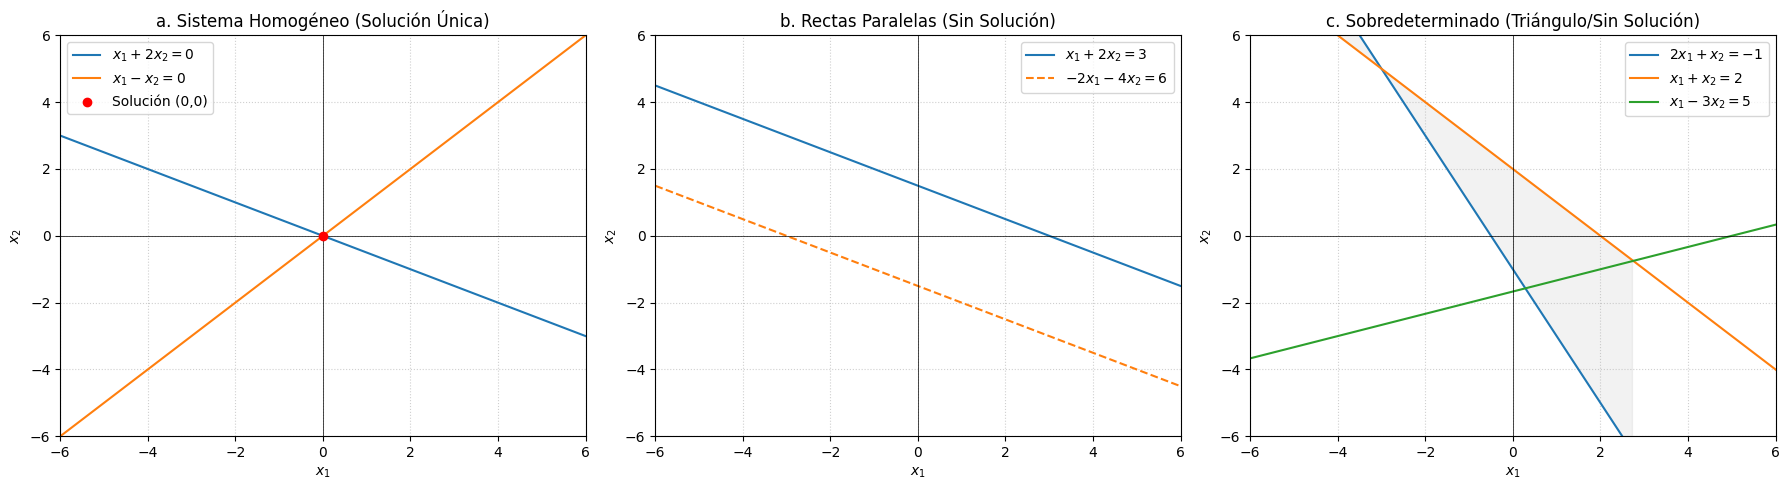

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración general de los gráficos
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
x = np.linspace(-10, 10, 400) # Rango de valores para x1

# --- CASO A: x1 + 2x2 = 0, x1 - x2 = 0 ---
# Despejamos x2 (que actuará como 'y' en el gráfico)
# Ec 1: 2x2 = -x1  -> x2 = -0.5 * x1
# Ec 2: x2 = x1
y_a1 = -0.5 * x
y_a2 = x

ax[0].plot(x, y_a1, label=r'$x_1 + 2x_2 = 0$')
ax[0].plot(x, y_a2, label=r'$x_1 - x_2 = 0$')
ax[0].scatter([0], [0], color='red', zorder=5, label='Solución (0,0)') # Punto solución
ax[0].set_title('a. Sistema Homogéneo (Solución Única)')

# --- CASO B: x1 + 2x2 = 3, -2x1 - 4x2 = 6 ---
# Despejamos x2
# Ec 1: 2x2 = 3 - x1 -> x2 = (3 - x1) / 2
# Ec 2: -4x2 = 6 + 2x1 -> x2 = (6 + 2x1) / -4
y_b1 = (3 - x) / 2
y_b2 = (6 + 2*x) / -4

ax[1].plot(x, y_b1, label=r'$x_1 + 2x_2 = 3$')
ax[1].plot(x, y_b2, '--', label=r'$-2x_1 - 4x_2 = 6$') # Línea punteada
ax[1].set_title('b. Rectas Paralelas (Sin Solución)')

# --- CASO C: 2x1 + x2 = -1, x1 + x2 = 2, x1 - 3x2 = 5 ---
# (Nota: Omitimos la 4ta ecuación x2+x3=1 para visualizar la contradicción en el plano 2D)
# Despejamos x2
# Ec 1: x2 = -1 - 2x1
# Ec 2: x2 = 2 - x1
# Ec 3: -3x2 = 5 - x1 -> x2 = (x1 - 5) / 3

y_c1 = -1 - 2*x
y_c2 = 2 - x
y_c3 = (x - 5) / 3

ax[2].plot(x, y_c1, label=r'$2x_1 + x_2 = -1$')
ax[2].plot(x, y_c2, label=r'$x_1 + x_2 = 2$')
ax[2].plot(x, y_c3, label=r'$x_1 - 3x_2 = 5$')
ax[2].fill_between(x, y_c1, y_c2, where=(y_c2>y_c3), alpha=0.1, color='gray') # Zona visual
ax[2].set_title('c. Sobredeterminado (Triángulo/Sin Solución)')

# Estilizado final para todos los gráficos
for a in ax:
    a.axhline(0, color='black', linewidth=0.5)
    a.axvline(0, color='black', linewidth=0.5)
    a.grid(True, linestyle=':', alpha=0.6)
    a.legend()
    a.set_xlabel(r'$x_1$')
    a.set_ylabel(r'$x_2$')
    a.set_xlim(-6, 6)
    a.set_ylim(-6, 6)

plt.tight_layout()
plt.show()

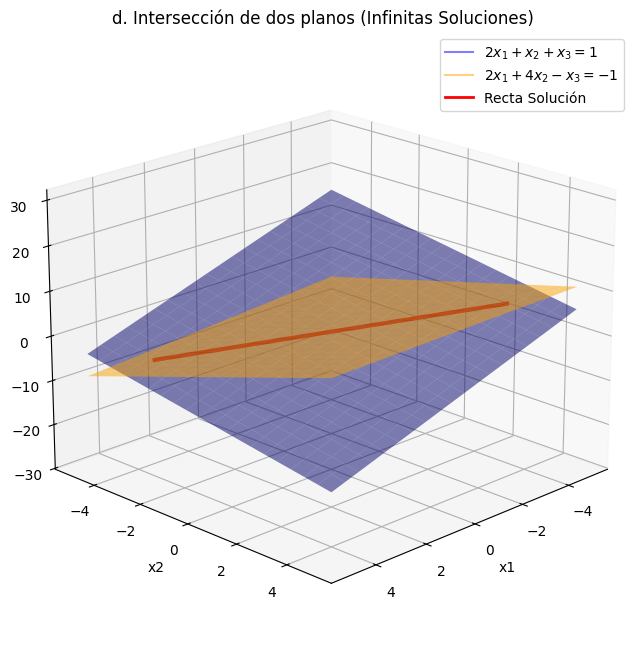

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Configuración 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creamos una malla (grid) para x1 y x2
x1_range = np.linspace(-5, 5, 20)
x2_range = np.linspace(-5, 5, 20)
X1, X2 = np.meshgrid(x1_range, x2_range)

# --- CASO D ---
# Ec 1: 2x1 + x2 + x3 = 1  -> Despejamos x3: x3 = 1 - 2x1 - x2
# Ec 2: 2x1 + 4x2 - x3 = -1 -> Despejamos x3: x3 = 2x1 + 4x2 + 1

Z1 = 1 - 2*X1 - X2
Z2 = 2*X1 + 4*X2 + 1

# Graficamos los planos (Superficies)
surf1 = ax.plot_surface(X1, X2, Z1, alpha=0.5, color='blue', label='Plano 1')
surf2 = ax.plot_surface(X1, X2, Z2, alpha=0.5, color='orange', label='Plano 2')

# Calculamos visualmente la línea de intersección para resaltarla
# Restando las ecuaciones: (2x1 + 4x2 + 1) - (1 - 2x1 - x2) = 0
# 4x1 + 5x2 = 0 -> x2 = -0.8 * x1
line_x1 = np.linspace(-4, 4, 100)
line_x2 = -0.8 * line_x1
# Sustituimos en Ec 1 para obtener x3 de la línea:
line_x3 = 1 - 2*line_x1 - line_x2

ax.plot(line_x1, line_x2, line_x3, color='red', linewidth=3, label='Intersección (Recta)')

# Etiquetas y vista
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('d. Intersección de dos planos (Infinitas Soluciones)')
ax.view_init(elev=20, azim=45) # Cambiar ángulo de cámara para ver mejor el corte

# Truco para mostrar legend en 3D (matplotlib tiene un bug a veces con surface legends)
import matplotlib.lines as mlines
blue_proxy = mlines.Line2D([], [], color='blue', alpha=0.5, label=r'$2x_1 + x_2 + x_3 = 1$')
orange_proxy = mlines.Line2D([], [], color='orange', alpha=0.5, label=r'$2x_1 + 4x_2 - x_3 = -1$')
red_line = mlines.Line2D([], [], color='red', linewidth=2, label='Recta Solución')
ax.legend(handles=[blue_proxy, orange_proxy, red_line])

plt.show()

- Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. La solución exacta para cada sistema es 𝑥1=−1, x2=2,𝑥3=3.

In [13]:
import numpy as np


def redondear_2_digitos(val):
    if val == 0: return 0.0
    return float(f"{val:.1e}")

def eliminacion_gaussiana(A_in, b_in):
    # Convertimos a float automáticamente para aceptar enteros
    A = np.array(A_in, dtype=float)
    b = np.array(b_in, dtype=float)
    n = len(b)
    
    
    Ab = np.zeros((n, n + 1))
    Ab[:, :-1] = A
    Ab[:, -1] = b

    # Proceso de eliminación
    for i in range(n - 1):
        if Ab[i, i] == 0:
            raise ValueError(f"Pivote cero en fila {i}. El método falla sin reordenar.")

        for j in range(i + 1, n):
            # Multiplicador m = Ab[j,i] / Ab[i,i]
            m = redondear_2_digitos(Ab[j, i] / Ab[i, i])
            
            # Restar fila: Fila_j = Fila_j - m * Fila_i
            for k in range(i, n + 1):
                termino = redondear_2_digitos(m * Ab[i, k])
                resultado = redondear_2_digitos(Ab[j, k] - termino)
                Ab[j, k] = resultado
                
    return Ab # Devuelve la matriz triangular superior

# ---------------------------------------------------------
# 3. PASO 2: SUSTITUCIÓN HACIA ATRÁS (Resuelve la Triangular)
# ---------------------------------------------------------
def sustitucion_hacia_atras(Ab):
    n = Ab.shape[0]
    x = np.zeros(n)
    
    # Última variable
    x[n - 1] = redondear_2_digitos(Ab[n - 1, n] / Ab[n - 1, n - 1])
    
    # Resto de variables hacia arriba
    for i in range(n - 2, -1, -1):
        suma = 0.0
        for j in range(i + 1, n):
            prod = redondear_2_digitos(Ab[i, j] * x[j])
            suma = redondear_2_digitos(suma + prod)
        
        resta = redondear_2_digitos(Ab[i, n] - suma)
        x[i] = redondear_2_digitos(resta / Ab[i, i])
        
    return x

# ---------------------------------------------------------
# 4. FUNCIÓN MAESTRA (Usa esto para matrices normales)
# ---------------------------------------------------------
def resolver_sistema_completo(A, b):
    print("1. Realizando eliminación gaussiana...")
    Ab_triangular = eliminacion_gaussiana(A, b)
    print("   -> Matriz triangular obtenida.")
    print(Ab_triangular)
    
    print("\n2. Realizando sustitución hacia atrás...")
    x = sustitucion_hacia_atras(Ab_triangular)
    return x


A_normal = [
    [-1, 4, 1],  
    [5/3, 2/3, 2/3],
    [2, 1,  4]
]

b_normal = [8,1, 11]


print("--- Entrada (Matriz Normal con Enteros) ---")
print(np.array(A_normal))
print(f"b = {b_normal}\n")

try:
    solucion = resolver_sistema_completo(A_normal, b_normal)
    
    print("\n" + "="*30)
    print(f"SOLUCIÓN FINAL: {solucion}")
    print("="*30)
except Exception as e:
    print(f"Error: {e}")

--- Entrada (Matriz Normal con Enteros) ---
[[-1.          4.          1.        ]
 [ 1.66666667  0.66666667  0.66666667]
 [ 2.          1.          4.        ]]
b = [8, 1, 11]

1. Realizando eliminación gaussiana...
   -> Matriz triangular obtenida.
[[-1.     4.     1.     8.   ]
 [-0.033  7.5    2.4   15.   ]
 [ 0.     0.     3.1    9.   ]]

2. Realizando sustitución hacia atrás...

SOLUCIÓN FINAL: [-0.7  1.1  2.9]


In [14]:
import numpy as np


def redondear_2_digitos(val):
    if val == 0: return 0.0
    return float(f"{val:.1e}")

def eliminacion_gaussiana(A_in, b_in):
    # Convertimos a float automáticamente para aceptar enteros
    A = np.array(A_in, dtype=float)
    b = np.array(b_in, dtype=float)
    n = len(b)
    
    
    Ab = np.zeros((n, n + 1))
    Ab[:, :-1] = A
    Ab[:, -1] = b

    # Proceso de eliminación
    for i in range(n - 1):
        if Ab[i, i] == 0:
            raise ValueError(f"Pivote cero en fila {i}. El método falla sin reordenar.")

        for j in range(i + 1, n):
            # Multiplicador m = Ab[j,i] / Ab[i,i]
            m = redondear_2_digitos(Ab[j, i] / Ab[i, i])
            
            # Restar fila: Fila_j = Fila_j - m * Fila_i
            for k in range(i, n + 1):
                termino = redondear_2_digitos(m * Ab[i, k])
                resultado = redondear_2_digitos(Ab[j, k] - termino)
                Ab[j, k] = resultado
                
    return Ab # Devuelve la matriz triangular superior

# ---------------------------------------------------------
# 3. PASO 2: SUSTITUCIÓN HACIA ATRÁS (Resuelve la Triangular)
# ---------------------------------------------------------
def sustitucion_hacia_atras(Ab):
    n = Ab.shape[0]
    x = np.zeros(n)
    
    # Última variable
    x[n - 1] = redondear_2_digitos(Ab[n - 1, n] / Ab[n - 1, n - 1])
    
    # Resto de variables hacia arriba
    for i in range(n - 2, -1, -1):
        suma = 0.0
        for j in range(i + 1, n):
            prod = redondear_2_digitos(Ab[i, j] * x[j])
            suma = redondear_2_digitos(suma + prod)
        
        resta = redondear_2_digitos(Ab[i, n] - suma)
        x[i] = redondear_2_digitos(resta / Ab[i, i])
        
    return x

# ---------------------------------------------------------
# 4. FUNCIÓN MAESTRA (Usa esto para matrices normales)
# ---------------------------------------------------------
def resolver_sistema_completo(A, b):
    print("1. Realizando eliminación gaussiana...")
    Ab_triangular = eliminacion_gaussiana(A, b)
    print("   -> Matriz triangular obtenida.")
    print(Ab_triangular)
    
    print("\n2. Realizando sustitución hacia atrás...")
    x = sustitucion_hacia_atras(Ab_triangular)
    return x

A_normal= [
    [4, 2, -1],  
    [1/9, 1/9, -1/3],
    [1, 4,  2]
]
b_normal = [-5, -1, 9]

print("--- Entrada (Matriz Normal con Enteros) ---")
print(np.array(A_normal))
print(f"b = {b_normal}\n")

try:
    solucion = resolver_sistema_completo(A_normal, b_normal)
    
    print("\n" + "="*30)
    print(f"SOLUCIÓN FINAL: {solucion}")
    print("="*30)
except Exception as e:
    print(f"Error: {e}")

--- Entrada (Matriz Normal con Enteros) ---
[[ 4.          2.         -1.        ]
 [ 0.11111111  0.11111111 -0.33333333]
 [ 1.          4.          2.        ]]
b = [-5, -1, 9]

1. Realizando eliminación gaussiana...
   -> Matriz triangular obtenida.
[[ 4.0e+00  2.0e+00 -1.0e+00 -5.0e+00]
 [ 1.1e-03  5.5e-02 -3.1e-01 -8.6e-01]
 [ 0.0e+00  0.0e+00  2.2e+01  6.5e+01]]

2. Realizando sustitución hacia atrás...

SOLUCIÓN FINAL: [-1.1  1.3  3. ]


In [15]:
import numpy as np

def resolver_gauss_con_analisis(A_in, b_in, nombre_sistema="Sistema"):
    print(f"\n{'='*40}")
    print(f"ANALIZANDO: {nombre_sistema}")
    print(f"{'='*40}")
    
    # Convertir a float
    A = np.array(A_in, dtype=float)
    b = np.array(b_in, dtype=float)
    n = len(b)
    
    # Crear matriz aumentada
    Ab = np.zeros((n, n + 1))
    Ab[:, :-1] = A
    Ab[:, -1] = b
    
    intercambios = 0
    
    # --- ELIMINACIÓN GAUSSIANA ---
    for i in range(n):
        # 1. Chequeo de Pivoteo (Intercambio de filas)
        # Buscamos el valor más grande en la columna actual (desde i hacia abajo)
        mayor_valor = 0
        fila_mayor = -1
        
        for k in range(i, n):
            val_abs = abs(Ab[k, i])
            if val_abs > mayor_valor:
                mayor_valor = val_abs
                fila_mayor = k
        
        # Si el mayor es 0, la columna es de ceros -> Sistema singular
        if mayor_valor == 0:
            print("❌ Error: Sistema singular (columna de ceros detectada). No se puede resolver.")
            return None

        # Si el mejor pivote NO está en la fila actual, hay que intercambiar
        if fila_mayor != i:
            print(f"⚠️  SE NECESITA INTERCAMBIO: Fila {i+1} <--> Fila {fila_mayor+1}")
            # Swap
            Ab[[i, fila_mayor]] = Ab[[fila_mayor, i]]
            intercambios += 1
        else:
            print(f"   - Columna {i+1}: No se necesitó intercambio.")

        # 2. Eliminación
        pivote = Ab[i, i]
        for j in range(i + 1, n):
            factor = Ab[j, i] / pivote
            Ab[j, i:] = Ab[j, i:] - factor * Ab[i, i:]

    # --- VERIFICACIÓN FINAL ---
    if Ab[n-1, n-1] == 0:
        print("❌ Error: Sistema singular o infinitas soluciones.")
        return None

    # --- SUSTITUCIÓN HACIA ATRÁS ---
    x = np.zeros(n)
    x[n-1] = Ab[n-1, n] / Ab[n-1, n-1]
    
    for i in range(n-2, -1, -1):
        suma = np.sum(Ab[i, i+1:n] * x[i+1:n])
        x[i] = (Ab[i, n] - suma) / Ab[i, i]
    
    print(f"\n✅ Total de intercambios realizados: {intercambios}")
    print(f"🔹 Solución: {x}")
    return x


matriz_a = [
    [1, -1, 3], 
    [3, -3, 1], 
    [1, 1, 0]
] 
vector_a = [2, -1, 3]

# SISTEMA B
matriz_b = [
    [2, -1.5, 3],
    [-1, 0, 2],
    [4, -4.5, 5]
]
vector_b = [1, 3, 1]

# SISTEMA C
matriz_c = [
    [2, 0, 0,0],  # Nota: Empieza con 0, esto forzará un intercambio
    [1, 1.5, 0,0],
    [0, -3, 0.5,0],
    [2, -2, 1,1]
]
vector_c = [3, 4.5, -6.6,0.8]

# SISTEMA D
matriz_d = [
    [1, 1, 0, 1],
    [2, 1, -1, 1],
    [4, -1, -2, 2],
    [3, -1, -1, 2]
]
vector_d = [2, 1, 0,-3]
# ==============================================================================
#  EJECUCIÓN AUTOMÁTICA
# ==============================================================================

resolver_gauss_con_analisis(matriz_a, vector_a, "SISTEMA A")
resolver_gauss_con_analisis(matriz_b, vector_b, "SISTEMA B")
resolver_gauss_con_analisis(matriz_c, vector_c, "SISTEMA C")
resolver_gauss_con_analisis(matriz_d, vector_d, "SISTEMA D")


ANALIZANDO: SISTEMA A
⚠️  SE NECESITA INTERCAMBIO: Fila 1 <--> Fila 2
⚠️  SE NECESITA INTERCAMBIO: Fila 2 <--> Fila 3
   - Columna 3: No se necesitó intercambio.

✅ Total de intercambios realizados: 2
🔹 Solución: [1.1875 1.8125 0.875 ]

ANALIZANDO: SISTEMA B
⚠️  SE NECESITA INTERCAMBIO: Fila 1 <--> Fila 3
   - Columna 2: No se necesitó intercambio.
   - Columna 3: No se necesitó intercambio.

✅ Total de intercambios realizados: 1
🔹 Solución: [-1. -0.  1.]

ANALIZANDO: SISTEMA C
   - Columna 1: No se necesitó intercambio.
⚠️  SE NECESITA INTERCAMBIO: Fila 2 <--> Fila 3
⚠️  SE NECESITA INTERCAMBIO: Fila 3 <--> Fila 4
   - Columna 4: No se necesitó intercambio.

✅ Total de intercambios realizados: 2
🔹 Solución: [ 1.5  2.  -1.2  3. ]

ANALIZANDO: SISTEMA D
⚠️  SE NECESITA INTERCAMBIO: Fila 1 <--> Fila 3
   - Columna 2: No se necesitó intercambio.
   - Columna 3: No se necesitó intercambio.
❌ Error: Sistema singular (columna de ceros detectada). No se puede resolver.


Para resolver este sistema, primero lo escribiremos en forma de matriz aumentada y aplicaremos la eliminación gaussiana para analizar su comportamiento según el valor de $\alpha$.El sistema es:

$x_1 - x_2 + \alpha x_3 = -2$
$-x_1 + 2x_2 - \alpha x_3 = 3$
$\alpha x_1 + x_2 + x_3 = 2$

1. Eliminación Gaussiana (Matriz Aumentada)Escribimos la matriz:$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
-1 & 2 & -\alpha & | & 3 \\
\alpha & 1 & 1 & | & 2 
\end{bmatrix}$$Paso 1: Sumamos la fila 1 a la fila 2 ($F_2 \leftarrow F_2 + F_1$) y restamos $\alpha$ veces la fila 1 a la fila 3 ($F_3 \leftarrow F_3 - \alpha F_1$):$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 1+\alpha & 1-\alpha^2 & | & 2+2\alpha 
\end{bmatrix}$$Paso 2: Restamos $(1+\alpha)$ veces la fila 2 a la fila 3 ($F_3 \leftarrow F_3 - (1+\alpha)F_2$):En la columna de términos independientes: $(2+2\alpha) - (1+\alpha)(1) = 2 + 2\alpha - 1 - \alpha = 1 + \alpha$.En la posición $A_{33}$: $(1-\alpha^2) - (1+\alpha)(0) = 1 - \alpha^2$.La matriz resultante es:$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 0 & 1-\alpha^2 & | & 1+\alpha 
\end{bmatrix}$$


Para resolver este sistema, primero lo escribiremos en forma de matriz aumentada y aplicaremos la eliminación gaussiana para analizar su comportamiento según el valor de $\alpha$.El sistema es:

$x_1 - x_2 + \alpha x_3 = -2$
$-x_1 + 2x_2 - \alpha x_3 = 3$
$\alpha x_1 + x_2 + x_3 = 2$

1. Eliminación Gaussiana (Matriz Aumentada)Escribimos la matriz:$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
-1 & 2 & -\alpha & | & 3 \\
\alpha & 1 & 1 & | & 2 
\end{bmatrix}$$Paso 1: Sumamos la fila 1 a la fila 2 ($F_2 \leftarrow F_2 + F_1$) y restamos $\alpha$ veces la fila 1 a la fila 3 ($F_3 \leftarrow F_3 - \alpha F_1$):$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 1+\alpha & 1-\alpha^2 & | & 2+2\alpha 
\end{bmatrix}$$Paso 2: Restamos $(1+\alpha)$ veces la fila 2 a la fila 3 ($F_3 \leftarrow F_3 - (1+\alpha)F_2$):En la columna de términos independientes: $(2+2\alpha) - (1+\alpha)(1) = 2 + 2\alpha - 1 - \alpha = 1 + \alpha$.En la posición $A_{33}$: $(1-\alpha^2) - (1+\alpha)(0) = 1 - \alpha^2$.La matriz resultante es:$$\begin{bmatrix}
1 & -1 & \alpha & | & -2 \\
0 & 1 & 0 & | & 1 \\
0 & 0 & 1-\alpha^2 & | & 1+\alpha 
\end{bmatrix}$$

In [16]:
import numpy as np

# Definir la matriz A (Coeficientes de consumo)
A = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
])

# Definir el vector x (Poblaciones)
x = np.array([1000, 500, 350, 400])

# Definir el vector b (Suministro disponible)
b = np.array([3500, 2700, 900])

# Calcular el consumo necesario (Producto punto)
consumo_necesario = np.dot(A, x)

print(f"Consumo Calculado: {consumo_necesario}")
print(f"Suministro Real:   {b}")

# Verificar si alcanza
sobra = b - consumo_necesario
es_suficiente = np.all(sobra >= 0)

print("\n" + "="*30)
if es_suficiente:
    print("✅ SÍ hay suficiente alimento.")
    print(f"Excedentes por tipo: {sobra}")
else:
    print("❌ NO hay suficiente alimento.")
    indices = np.where(sobra < 0)[0]
    print(f"Falta alimento en los índices: {indices + 1}")

Consumo Calculado: [3200 2500  750]
Suministro Real:   [3500 2700  900]

✅ SÍ hay suficiente alimento.
Excedentes por tipo: [300 200 150]
